Text(0,0.5,'Prediction')

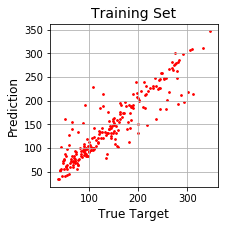

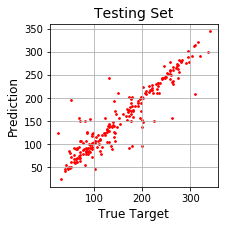

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

n=440
n2=10
for j in range(n2):
    mean=0
    mean2=0
    mean3=0
    sum1=0.0
    sums1=0
    sum2=0
    sums2=0
    sum3=0
    sd1=0
    sd2=0
    for i in range(n):
        sum1=sum1+X[i,j]
    mean=sum1/n
    
    for i in range(n):
        sums1=sums1+((X[i,j]-mean)**2)
    sd1=math.sqrt(sums1/(n-1))
    
    for i in range(n):
        X[i,j]=(X[i,j]-mean)
        sum2=sum2+X[i,j]
    mean2=sum2/n
    
    for i in range(n):
        X[i,j]=(X[i,j])/sd1
        sum3=sum3+X[i,j]
        sums2=sums2+((X[i,j]-mean2)**2)
    mean3=sum3/n
    sd2=math.sqrt(sums2/(n-1))
    
NXX=np.zeros((440,10))
NXX=X[0:440,:]
nt=np.zeros((440))
y2=y[0:440]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NXX, y2, test_size=0.5)
def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

N_train, p_train = X_train.shape
# Space for design matrix
#
M_train = 150
U_train = np.zeros((N_train,M_train))
# Basis function locations at random
#
kmeans_train = KMeans(n_clusters=M_train)
kmeans_train.fit(X_train)
labels_train =kmeans_train.predict(X_train)
C_train = kmeans_train.cluster_centers_
# Basis function range as distance between two random data
#
sigma_train= np.mean(scipy.spatial.distance.pdist(X_train))

# Construct the design matrix
#
for i in range(N_train):
    for j in range(M_train):
        U_train[i,j] = gaussian(X_train[i,:], C_train[j,:], sigma_train)
# Pseudo inverse solution for linear part
#
l_train = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train
# Predicted values on training data
#
yh_train = U_train @ l_train
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y_train, yh_train, c='r', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)







N_test, p_test = X_test.shape
# Space for design matrix
#
M_test = 150
U_test = np.zeros((N_test,M_test))
# Basis function locations at random
#
kmeans_test = KMeans(n_clusters=M_test)
kmeans_test.fit(X_test)
labels_test =kmeans_test.predict(X_test)
C_test = kmeans_test.cluster_centers_
# Basis function range as distance between two random data
#
sigma_test= np.mean(scipy.spatial.distance.pdist(X_test))

# Construct the design matrix
#
for i in range(N_test):
    for j in range(M_test):
        U_test[i,j] = gaussian(X_test[i,:], C_test[j,:], sigma_test)
# Pseudo inverse solution for linear part
#
l_test = np.linalg.inv(U_test.T @ U_test) @ U_test.T @ y_test
# Predicted values on training data
#
yh_test = U_test @ l_test
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y_test, yh_test, c='r', s=3)
ax.grid(True)
ax.set_title("Testing Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)





220 10
(220,)
[  3.02749204 -25.84863008   8.29489788  14.88615892 -92.03384127
  62.29070848  31.55940826  33.92536868  42.71398892  10.8621216 ]
220 10
(220,)
[ -1.70565586   2.08099085  39.89294546  16.10272486   6.0794346
 -15.76486844 -13.75880523  -4.45111146  29.21391062  -5.43434763]


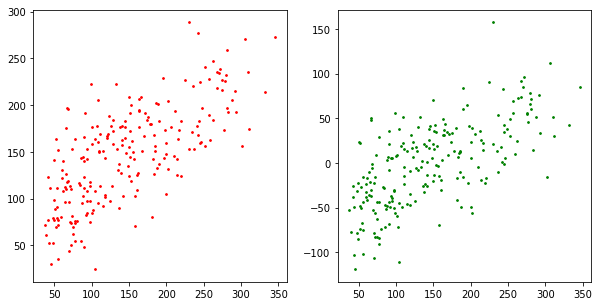

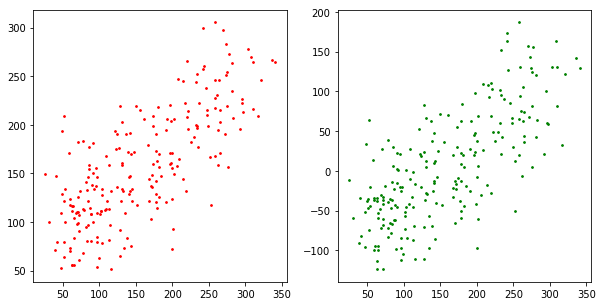

In [22]:
%matplotlib inline
import math
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
# Inspect sizes
#


NumData, NumFeatures = X_train.shape
print(NumData, NumFeatures) # 440 X 10
print(y_train.shape) # 440

# Linear regression using sklearn
#
lin_train = LinearRegression(fit_intercept=True)
lin_train.fit(X_train, y_train)
th1_train = lin_train.predict(X_train)
# Pseudo-incerse solution to linear regression
#
w_train = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(w_train)
th2_train = X_train @ w_train
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(y_train, th1_train, c='r', s=3)
ax[1].scatter(y_train, th2_train, c='g', s=3)



NumData, NumFeatures = X_test.shape
print(NumData, NumFeatures) # 442 X 10
print(y_test.shape) # 442


# Linear regression using sklearn
#
lin_test = LinearRegression(fit_intercept=True)
lin_test.fit(X_test, y_test)
th1_test = lin_test.predict(X_test)
# Pseudo-incerse solution to linear regression
#
w_test = np.linalg.inv(X_test.T @ X_test) @ X_test.T @ y_test
print(w_test)
th2_test = X_test @ w_test
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(y_test, th1_test, c='r', s=3)
ax[1].scatter(y_test, th2_test, c='g', s=3)

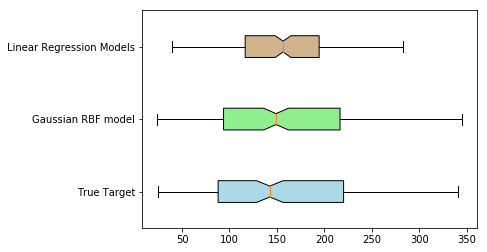

In [17]:
box_plot_data=[y_test,yh_test,th1_test]
box=plt.boxplot(box_plot_data,notch='True',vert=0,patch_artist=True,labels=['True Target','Gaussian RBF model','Linear Regression Models'])

colors = ['lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()